In [9]:
import os
import pandas as pd
import matplotlib.pyplot as plt

Processing file: base_model.csv
- Dataset shape: (1000, 2)

   + Columns: ['Disease_Information', 'Body_System']

   + First 5 rows:
                                 Disease_Information            Body_System
0  Cerebellar Ataxia Syndrome: progressive loss o...          NervousSystem
1  Osteo-Fibrotic Myopathy: severe muscle weaknes...  MusculoskeletalSystem
2  Vasculitis Purpura: inflammation of blood vess...      CirculatorySystem
3  Entero-Gastric Dysmotility: chronic nausea, vo...        DigestiveSystem
4  Pulmonic Sclerosis: gradual hardening and scar...      RespiratorySystem

- Missing values per column:
Disease_Information    0
Body_System            0
dtype: int64

- Number of diseases per body system:
Body_System
MusculoskeletalSystem    102
CirculatorySystem        102
IntegumentarySystem      102
UrinarySystem            102
NervousSystem            100
ImmuneSystem             100
RespiratorySystem         99
EndocrineSystem           98
ReproductiveSystem        98
Digest

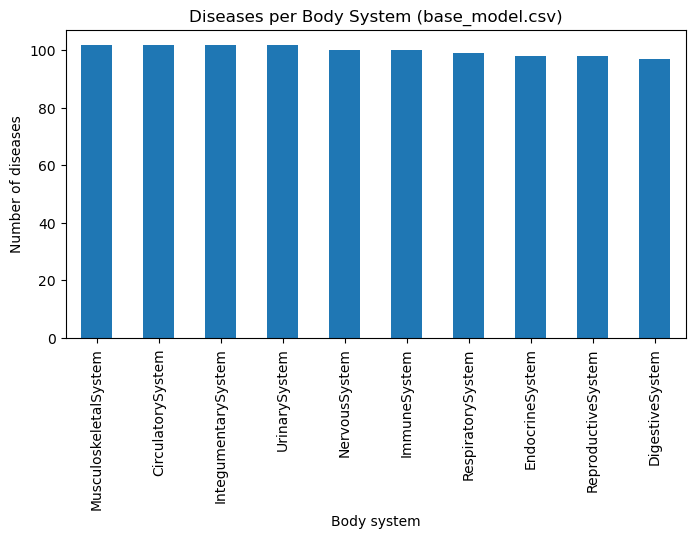


- Description length statistics:
count    1000.000000
mean      157.187000
std        21.660037
min        94.000000
25%       143.000000
50%       156.000000
75%       169.250000
max       238.000000
Name: Description_Length, dtype: float64

- No duplicate diseases found.


Processing file: client_1_data.csv
- Dataset shape: (300, 2)

   + Columns: ['Disease_Information', 'Body_System']

   + First 5 rows:
                                 Disease_Information        Body_System
0  Myocardial Fibrosis: Progressive hardening of ...  CirculatorySystem
1  Alveolar Sclerosis: Thickening and scarring of...  RespiratorySystem
2  Gastric Atrophy Syndrome: Widespread thinning ...    DigestiveSystem
3  Cerebral Synapse Decay: Gradual loss of neural...      NervousSystem
4  Neuromuscular Dysregulation: Involuntary muscl...      NervousSystem

- Missing values per column:
Disease_Information    0
Body_System            0
dtype: int64

- Number of diseases per body system:
Body_System
UrinarySyste

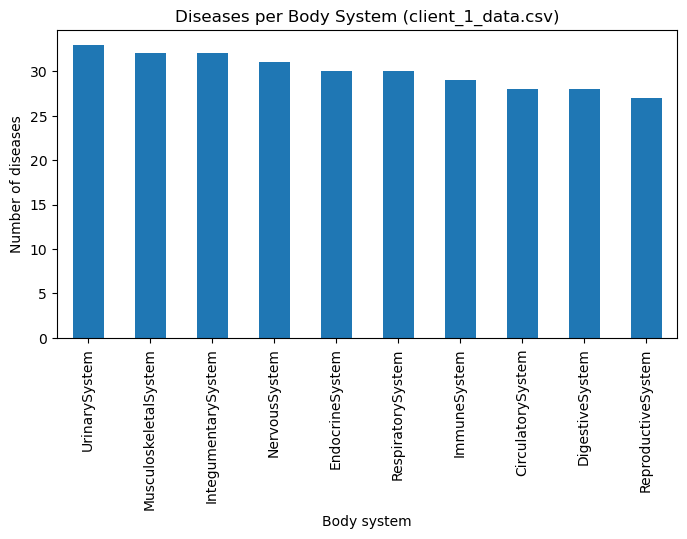


- Description length statistics:
count    300.000000
mean     151.860000
std       18.116505
min      103.000000
25%      138.750000
50%      153.000000
75%      163.000000
max      201.000000
Name: Description_Length, dtype: float64

- No duplicate diseases found.


Processing file: client_2_data.csv
- Dataset shape: (300, 2)

   + Columns: ['Disease_Information', 'Body_System']

   + First 5 rows:
                                 Disease_Information            Body_System
0  Lympha-Cryptosis: Hidden lymphatic blockages c...           ImmuneSystem
1  Neur-Amplification Disorder: Hypersensitivity ...          NervousSystem
2  Osteo-Gravel Disease: Formation of small, pain...  MusculoskeletalSystem
3  Vascular Webbing Sclerosis: Formation of fibro...      CirculatorySystem
4  Pulmo-Crystalization: Accumulation of microsco...      RespiratorySystem

- Missing values per column:
Disease_Information    0
Body_System            0
dtype: int64

- Number of diseases per body system:
Body_Sys

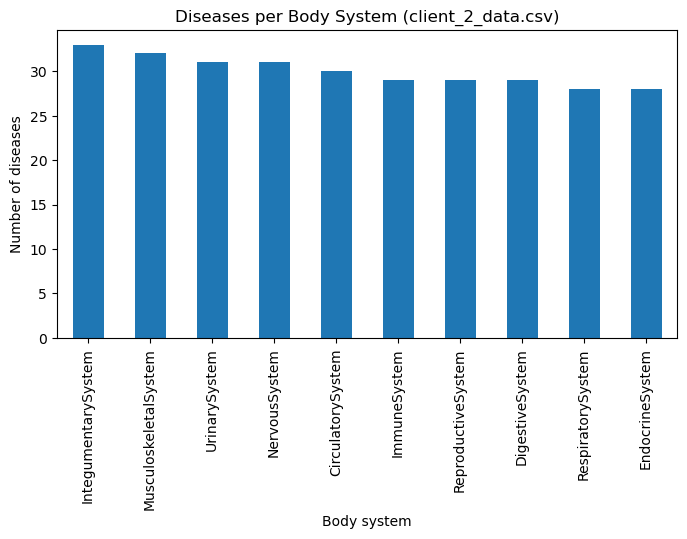


- Description length statistics:
count    300.000000
mean     157.326667
std       19.718079
min      111.000000
25%      143.000000
50%      156.000000
75%      170.000000
max      208.000000
Name: Description_Length, dtype: float64

- No duplicate diseases found.


Processing file: client_3_data.csv
- Dataset shape: (300, 2)

   + Columns: ['Disease_Information', 'Body_System']

   + First 5 rows:
                                 Disease_Information            Body_System
0  Atherothrombosis Duplex: Progressive hardening...      CirculatorySystem
1  Pneumonic Cryptofibrosis: Infiltrative lung di...      RespiratorySystem
2  Neuralgia Synaptica: Chronic, debilitating ner...          NervousSystem
3  Osteo-Fibro Myalgia: Widespread chronic pain i...  MusculoskeletalSystem
4  Pancreatic Insulitis Autoimmune: Autoimmune at...        EndocrineSystem

- Missing values per column:
Disease_Information    0
Body_System            0
dtype: int64

- Number of diseases per body system:
Body_Sys

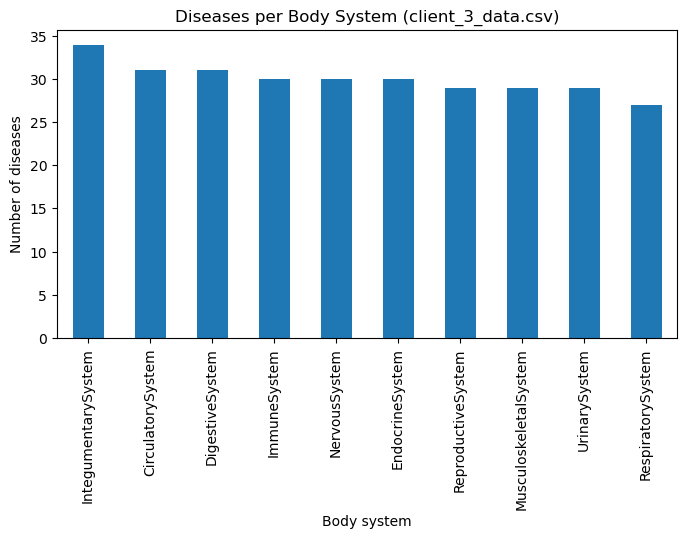


- Description length statistics:
count    300.000000
mean     159.073333
std       27.057995
min      112.000000
25%      143.750000
50%      155.000000
75%      168.250000
max      418.000000
Name: Description_Length, dtype: float64

- No duplicate diseases found.




In [13]:
# Path to your folder
DATA_FOLDER = r"D:\Hoàng Phong\University stuff\Khoa luan\Graph Federated Learning\data\medical"

# List all CSV files in the folder
csv_files = [f for f in os.listdir(DATA_FOLDER) if f.endswith(".csv")]

for file in csv_files:
    file_path = os.path.join(DATA_FOLDER, file)
    print("="*80)
    print(f"Processing file: {file}")
    print("="*80)

    try:
        # Read dataset
        df = pd.read_csv(file_path)

        # Overview
        print("- Dataset shape:", df.shape)
        print("\n   + Columns:", df.columns.tolist())
        print("\n   + First 5 rows:")
        print(df.head())

        # Check missing values
        print("\n- Missing values per column:")
        print(df.isnull().sum())

        # Extract disease name
        if "Disease_Information" in df.columns:

            # Extract disease name
            df["Disease_Name"] = df["Disease_Information"].str.split(".").str[0]

            # Count by Body_System
            if "Body_System" in df.columns:
                system_counts = df["Body_System"].value_counts()
                print("\n- Number of diseases per body system:")
                print(system_counts)

                # Plot bar chart
                system_counts.plot(kind="bar", figsize=(8,4), title=f"Diseases per Body System ({file})")
                plt.ylabel("Number of diseases")
                plt.xlabel("Body system")
                plt.show()

            # Length of description
            df["Description_Length"] = df["Disease_Information"].str.len()
            print("\n- Description length statistics:")
            print(df["Description_Length"].describe())

            # Check duplicates by Disease_Name
            duplicates = df[df.duplicated("Disease_Name", keep=False)]
            if not duplicates.empty:
                print("\n- Duplicate diseases found:")
                print(duplicates[["Disease_Name", "Body_System"]])
            else:
                print("\n- No duplicate diseases found.")
            print("\n")

    except Exception as e:
        print(f"Error processing file {file}: {e}")
